### geopandas & descartes 라이브러리 설치 필요


In [105]:
# !pip install pyproj

In [106]:
# from pyproj import Proj, transforM

In [135]:
import pandas as pd
import numpy as np

import geopandas as gpd
import fiona
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

### gpd.read_file로 shp파일을 읽어온다. 
- shp파일만 있으면 오류가 발생한다. dbf, shx 파일도 함께 있어야 한다.

In [136]:
# cultural_fac = gpd.read_file('C:\\Users\\moon\\Desktop\\추가 반출\\429. 서울시 다문화지원시설 공간데이터\\2. 파일데이터\\2017\\다문화지원시설\\TL_MGT_SPT_FCLTY\\TL_MGT_SPT_FCLTY.shp', encoding='cp949')
cultural_fac = pd.read_excel('C:\\Users\\moon\\Desktop\\추가 반출\\208. 서울시 14~15년 문화시설 위치도\\2. 파일데이터\\문화시설.xls')

In [137]:
culture = cultural_fac.loc[cultural_fac['서브카테고리 명\n(선택 입력)'].isin(['도서관','문화원','문화예술회관'])]

In [138]:
culture_df = culture.loc[:,['콘텐츠명\n(필수 입력)','서브카테고리 명\n(선택 입력)','좌표[X]\n(조건부 선택 입력)','좌표[Y]\n(조건부 선택 입력)']]

In [139]:
culture_df.columns = ['name','category','x','y']
culture_df = culture_df.reset_index(drop=True)

In [140]:
culture_df

name category           x          y
0            금천구립독산정보도서관      도서관  126.908060  37.467495
1                 곰달래도서관      도서관  126.848894  37.529041
2    우장산숲속도서관(강서구 통합도서관)      도서관  126.841834  37.548263
3                강서등빛도서관      도서관  126.842366  37.562423
4            강서푸른들청소년도서관      도서관  126.835163  37.544668
..                   ...      ...         ...        ...
177            석관동미리내도서관      도서관  127.065472  37.613465
178            중랑숲어린이도서관      도서관  127.103864  37.602655
179             송파글마루도서관      도서관  127.130470  37.480773
180         송파어린이영어작은도서관      도서관  127.101941  37.522536
181             송파어린이도서관      도서관  127.082406  37.512107

[182 rows x 4 columns]

In [141]:
culture_gdf = gpd.GeoDataFrame(culture_df, geometry = gpd.points_from_xy(culture_df.y, culture_df.x))

In [142]:
culture_gdf.crs = 4326

In [143]:
culture = culture_gdf.to_crs(4326)

base 지도 import

In [144]:
seoul = gpd.read_file('C:\\Users\\moon\\Desktop\\LSMD_ADM_SECT_UMD_서울\\LSMD_ADM_SECT_UMD_11.shp', encoding='cp949')

In [145]:
seoul = seoul.to_crs(4326)

C:\Users\moon\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


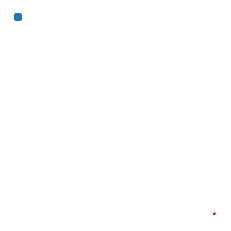

In [148]:
base = seoul.plot(color='w', edgecolor='m')

ax = culture_gdf.plot(figsize=(15,15), ax=base)
ax.set_axis_off()
plt.show()

## `


In [73]:
culture_gdf2 = gpd.GeoDataFrame(culture_df, geometry = gpd.points_from_xy(culture_df.x, culture_df.y))

In [93]:
culture_gdf2.crs = {'init': 'epsg:5179'}

In [89]:
seoul

EMD_CD  EMD_NM  SGG_OID COL_ADM_SE   GID  \
0    11440124     연남동     4579      11440  5134   
1    11440121     동교동     4899      11440  5145   
2    11290104  동소문동1가     1105      11290  2809   
3    11290123   안암동3가      406      11290  2810   
4    11590103    상도1동      385      11590  2665   
..        ...     ...      ...        ...   ...   
462  11110112     체부동      323      11110  3035   
463  11440102     공덕동     5217      11440  5227   
464  11440109     염리동     5218      11440  5228   
465  11290133     정릉동     1409      11290  5266   
466  11290134     길음동     1410      11290  5267   

                                              geometry  
0    POLYGON ((948463.577 1952085.035, 948483.560 1...  
1    MULTIPOLYGON (((948665.278 1951067.358, 948676...  
2    POLYGON ((956316.467 1954570.243, 956321.222 1...  
3    POLYGON ((958047.781 1954203.838, 958038.530 1...  
4    POLYGON ((951048.818 1945025.905, 951059.497 1...  
..                                                 ...  
462  POLYGON ((953193.914 1953453.384, 953197.789 1...  
463  POLYGON ((951066.172 1949711.936, 951071.013 1...  
464  POLYGON ((950852.026 1949415.202, 950875.438 1...  
465  MULTIPOLYGON (((957804.580 1955956.741, 957805...  
466  POLYGON ((957426.197 1956419.850, 957419.578 1...  

[467 rows x 6 columns]

In [152]:
our_data = pd.read_csv('C:\\Users\\moon\\Desktop\\추가 반출\\문화체육시설.csv')

In [194]:
our_data

콘텐츠ID 사용유무                 콘텐츠명 서브카테고리    구     동         X좌표  \
0       ID000551    Y          금천구립독산정보도서관    도서관  금천구  독산4동  126.908060   
1       ID000541    Y               곰달래도서관    도서관  강서구  화곡8동  126.848894   
2       ID000540    Y  우장산숲속도서관(강서구 통합도서관)    도서관  강서구   화곡동  126.841834   
3       ID000539    Y              강서등빛도서관    도서관  강서구   등촌동  126.842366   
4       ID000538    Y          강서푸른들청소년도서관    도서관  강서구  화곡3동  126.835163   
..           ...  ...                  ...    ...  ...   ...         ...   
600  Sport_00019    Y          강북청소년수련관수영장    수영장  강북구   수유동  127.006464   
601  Sport_00021    Y          강서구민올림픽체육센터  생활체육관  강서구  등촌3동  126.850574   
602  Sport_00022    Y     강서구민올림픽체육센터골프연습장  골프연습장  강서구  등촌3동  126.850535   
603  Sport_00023    Y       강서구민올림픽체육센터수영장    수영장  강서구  등촌3동  126.850550   
604  Sport_00024    Y             개운산스포츠센터  생활체육관  성북구   종암동  127.026153   

           Y좌표  
0    37.467495  
1    37.529041  
2    37.548263  
3    37.562423  
4    37.544668  
..         ...  
600  37.646104  
601  37.559695  
602  37.559619  
603  37.559777  
604  37.596782  

[605 rows x 8 columns]

In [159]:
from collections import Counter
counter = Counter()

In [163]:
our_counter = Counter(our_data['동'])
seoul_counter = Counter(seoul.EMD_NM)

In [172]:
seoul_list = list(seoul_counter.keys())
our_list = list(our_counter.keys())

In [193]:
seoul

EMD_CD  EMD_NM  SGG_OID COL_ADM_SE   GID  \
0    11440124     연남동     4579      11440  5134   
1    11440121     동교동     4899      11440  5145   
2    11290104  동소문동1가     1105      11290  2809   
3    11290123   안암동3가      406      11290  2810   
4    11590103    상도1동      385      11590  2665   
..        ...     ...      ...        ...   ...   
462  11110112     체부동      323      11110  3035   
463  11440102     공덕동     5217      11440  5227   
464  11440109     염리동     5218      11440  5228   
465  11290133     정릉동     1409      11290  5266   
466  11290134     길음동     1410      11290  5267   

                                              geometry  
0    POLYGON ((126.91643 37.56669, 126.91665 37.566...  
1    MULTIPOLYGON (((126.91878 37.55753, 126.91891 ...  
2    POLYGON ((127.00520 37.58949, 127.00525 37.589...  
3    POLYGON ((127.02483 37.58627, 127.02472 37.586...  
4    POLYGON ((126.94617 37.50320, 126.94629 37.503...  
..                                                 ...  
462  POLYGON ((126.96990 37.57927, 126.96994 37.579...  
463  POLYGON ((126.94605 37.54544, 126.94611 37.545...  
464  POLYGON ((126.94365 37.54276, 126.94391 37.543...  
465  MULTIPOLYGON (((127.02197 37.60206, 127.02199 ...  
466  POLYGON ((127.01766 37.60622, 127.01758 37.606...  

[467 rows x 6 columns]

In [190]:
temp2 = []
for i in our_list: # 우리(행정) 데이터에 있는데 서울 데이터(법정)에 없는 동
    if i not in seoul_list:
        temp2.append(i)

In [191]:
len(temp2)

72

In [192]:
temp2

['독산4동',
 '화곡8동',
 '화곡3동',
 '화곡4동',
 '신월4동',
 '목5동',
 '대림3동',
 '봉천본동',
 '신정6동',
 '시흥3동',
 '조원동',
 '시흥1동',
 '개봉3동',
 '신월5동',
 '신정4동',
 '구로5동',
 '고척2동',
 '개포2동',
 '삼양동',
 '번2동',
 '노량진2동',
 '아현',
 '역삼1동',
 '대학동',
 '홍은1동',
 '남가좌2동',
 '대치4동',
 '월계2동',
 '도봉1동',
 '창1동',
 '신대방2동',
 '상도2동',
 '홍은2동',
 '창5동',
 '암사2동',
 '천호1동',
 '면목4동',
 '중계본동',
 '자양4동',
 '잠실3동',
 '공릉2동',
 '상계10동',
 '중계4동',
 '낙성대동',
 '미성동',
 '시흥2동',
 '독산3동',
 '성수1가1동',
 '성수동',
 '반포2동',
 '문래동',
 '면목2동',
 '망우본동',
 '창4동',
 '도봉2동',
 '역삼2동',
 '금호2가',
 '이문2동',
 '면목7동',
 '서초4동',
 '신월1동',
 '고덕1동',
 '화곡6동',
 '방화3동',
 '가양1동',
 '목1동',
 '마천1동',
 '중계1동',
 '구로2동',
 '일원1동',
 '명일1동',
 '등촌3동']

In [205]:
with open('C:\\Users\\moon\\Desktop\\추가 반출\\문화센터개수(좌표포함).bin', mode='rb') as f:
    file = f.read()

In [206]:
file

b'\x80\x03cgeopandas.geodataframe\nGeoDataFrame\nq\x00)\x81q\x01}q\x02(X\x04\x00\x00\x00_mgrq\x03cpandas.core.internals.managers\nBlockManager\nq\x04)\x81q\x05(]q\x06(cpandas.core.indexes.base\n_new_Index\nq\x07cpandas.core.indexes.base\nIndex\nq\x08}q\t(X\x04\x00\x00\x00dataq\ncnumpy.core.multiarray\n_reconstruct\nq\x0bcnumpy\nndarray\nq\x0cK\x00\x85q\rC\x01bq\x0e\x87q\x0fRq\x10(K\x01K\x03\x85q\x11cnumpy\ndtype\nq\x12X\x02\x00\x00\x00O8q\x13\x89\x88\x87q\x14Rq\x15(K\x03X\x01\x00\x00\x00|q\x16NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?tq\x17b\x89]q\x18(X\n\x00\x00\x00EMD_KOR_NMq\x19X\x08\x00\x00\x00geometryq\x1aX\x03\x00\x00\x00CNTq\x1betq\x1cbX\x04\x00\x00\x00nameq\x1dNu\x86q\x1eRq\x1fh\x07cpandas.core.indexes.numeric\nInt64Index\nq }q!(h\nh\x0bh\x0cK\x00\x85q"h\x0e\x87q#Rq$(K\x01M\xd3\x01\x85q%h\x12X\x02\x00\x00\x00i8q&\x89\x88\x87q\'Rq((K\x03X\x01\x00\x00\x00<q)NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq*b\x89B\x98\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00